In [12]:
import json
import matplotlib.pyplot as plt

%matplotlib inline

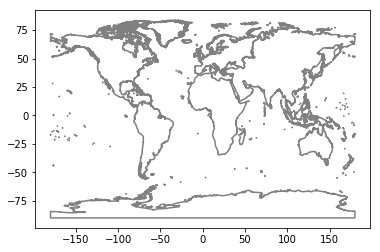

In [13]:
f = "data/continents.geojson"
with open(f, 'r') as infile:
    g = json.load(infile)

from shapely.geometry import shape
for feature in g['features']:
    sf = shape(feature['geometry'])
    if feature['geometry']['type'] == 'MultiPolygon':
        for geom in sf.geoms:
                plt.plot(*geom.exterior.xy, color='grey')
    else:
        plt.plot(*sf.exterior.xy, color='grey')

In [14]:
import pandas as pd
participants2018 = pd.read_csv('data/participants2018.csv', encoding='latin-1')

In [15]:
participants2018

,name,email,lat,lon,affiliation
0,Alain Pholo Bala,apholo@uj.ac.za,-26.2614,27.92260,University of Johannesburg
1,Annie Lee,annieslee777@gmail.com,40.5008,-74.44740,Rutgers University
2,Yan Cen,cenyan0304@live.cn,43.8171,125.32350,Northeast Normal University
3,Brian Asquith,basquith86@gmail.com,42.2900,-85.59810,W.E. Upjohn Institute
4,Raul Silveira Neto,rau.silveira@uol.com.br,-8.0441,-34.88610,Federal University of Pernambuco
5,Alin Halimatussadiah,alin.halimah@gmail.com,6.3628,106.82700,University of Indonesia
6,Zhangliang Chen,zchen105@gmail.com,42.3770,-71.11670,Harvard Kennedy School
7,AndrÃ© Chagas,achagas@usp.br,-23.5447,-46.62529,University of Sao Paulo
8,Mitsuru Ota,ota@sk.tsukuba.ac.jp,36.1088,140.10370,University of Tsukuba
9,Vikash Dangal,vdangal@agcenter.lsu.edu,30.4133,-91.18000,Louisiana State University


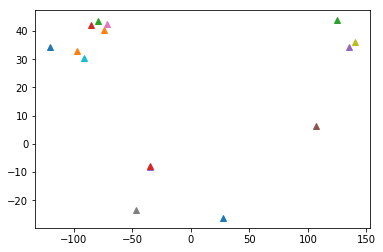

In [16]:
for idx, p in participants2018.iterrows():
    plt.plot(p['lon'], p['lat'], '^')

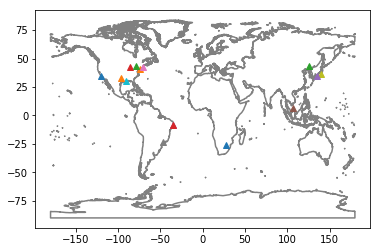

In [17]:
from shapely.geometry import shape
for feature in g['features']:
    sf = shape(feature['geometry'])
    if feature['geometry']['type'] == 'MultiPolygon':
        for geom in sf.geoms:
            plt.plot(*geom.exterior.xy, color='grey')
    else:
        plt.plot(*sf.exterior.xy, color='grey')
    
for idx, p in participants2018.iterrows():
    plt.plot(p['lon'], p['lat'], '^')     
    

In [18]:
sanantonio = ( -98.4936, 29.4241)


In [19]:
import pyproj

In [20]:
pyproj.Geod?

Init signature: pyproj.Geod(initstring=None, **kwargs)
Docstring:     
performs forward and inverse geodetic, or Great Circle,
computations.  The forward computation (using the 'fwd' method)
involves determining latitude, longitude and back azimuth of a
computations.  The forward computation (using the 'fwd' method)
involves determining latitude, longitude and back azimuth of a
terminus point given the latitude and longitude of an initial
point, plus azimuth and distance. The inverse computation (using
the 'inv' method) involves determining the forward and back
azimuths and distance given the latitudes and longitudes of an
initial and terminus point.
File:           ~/anaconda3/envs/workshop18/lib/python3.6/site-packages/pyproj/__init__.py
Type:           type


In [21]:
geod = pyproj.Geod(ellps='WGS84')

In [22]:
gcd = geod.inv(sanantonio[0], sanantonio[1], 27.9977, -26.1836)
gcd

(99.44945275797292, -73.25284857321697, 14789647.913576363)

In [23]:
gcd[-1] * 0.000621371

9189.858313706858

In [24]:
waypoints = geod.npts(sanantonio[0], sanantonio[1], 27.9977, -26.1836, 20)

In [25]:
waypoints

[(-91.41449425249206, 28.192804475174466),
 (-84.51833543849146, 26.60442667215169),
 (-77.82855500585654, 24.691398772744847),
 (-71.35452782212195, 22.489306194453516),
 (-65.09318538433183, 20.035096667078058),
 (-59.03132471724339, 17.365726665062645),
 (-53.14805079056395, 14.517274235298915),
 (-47.41698433306964, 11.524470007973203),
 (-41.80805827289644, 8.42056236722858),
 (-36.28886853819071, 5.2374272022038415),
 (-30.825631426329934, 2.0058435783911532),
 (-25.383842638029023, -1.2441268676408566),
 (-19.928749445090887, -4.482703818088809),
 (-14.425751421697214, -7.67993205404189),
 (-8.840845466235066, -10.805237603098677),
 (-3.1412307345613755, -13.827031300611198),
 (2.7038134184298457, -16.712403823776647),
 (8.72167577155625, -19.426970544491255),
 (14.934722298131163, -21.934941180454807),
 (21.35817518345314, -24.199502271564693)]

In [26]:
#route = [minn]
route = [sanantonio]
route.extend(waypoints)
route.append((27.9977, -26.1836))

In [28]:
import numpy as np
route = np.array(route)

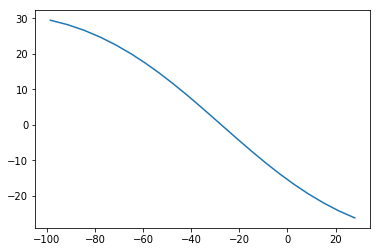

In [29]:
plt.plot(route[:,0], route[:,1])

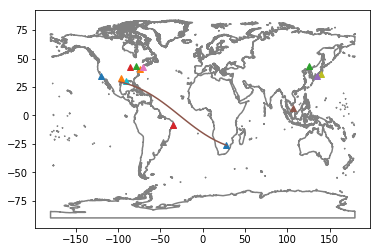

In [30]:
from shapely.geometry import shape
for feature in g['features']:
    sf = shape(feature['geometry'])
    if feature['geometry']['type'] == 'MultiPolygon':
        for geom in sf.geoms:
            plt.plot(*geom.exterior.xy, color='grey')
    else:
        plot(*sf.exterior.xy, color='grey')
    
for idx, p in participants2018.iterrows():
    plt.plot(p['lon'], p['lat'], '^')     

plt.plot(route[:,0], route[:,1])

## On your own

1. Calculate and plot the great circle routes bringing our participants to the workshop.

# Solution

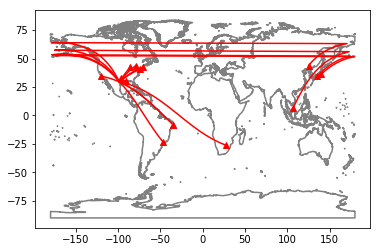

In [31]:
import pandas as pd
participants2018 = pd.read_csv('data/participants2018.csv', encoding='latin-1')
from shapely.geometry import shape
for feature in g['features']:
    sf = shape(feature['geometry'])
    if feature['geometry']['type'] == 'MultiPolygon':
        for geom in sf.geoms:
            plt.plot(*geom.exterior.xy, color='grey')
    else:
        plt.plot(*sf.exterior.xy, color='grey')
    
for idx, p in participants2018.iterrows():
    plt.plot(p['lon'], p['lat'], '^', markerfacecolor='r', markeredgecolor='r')     


for idx, p in participants2018.iterrows():
    waypoints = geod.npts(sanantonio[0], sanantonio[1], p['lon'], p['lat'], 20)
    route = [sanantonio]
    route.extend(waypoints)
    route.append((p['lon'], p['lat']))
    route = np.array(route)
    plt.plot(route[:,0], route[:,1], color='r')

### Break the line

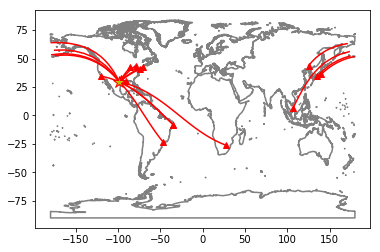

In [32]:
import pandas as pd
participants2018 = pd.read_csv('data/participants2018.csv',encoding='latin-1')
from shapely.geometry import shape
for feature in g['features']:
    sf = shape(feature['geometry'])
    if feature['geometry']['type'] == 'MultiPolygon':
        for geom in sf.geoms:
            plt.plot(*geom.exterior.xy, color='grey')
    else:
        plt.plot(*sf.exterior.xy, color='grey')
    
for idx, p in participants2018.iterrows():
    plt.plot(p['lon'], p['lat'], '^', markerfacecolor='r', markeredgecolor='r')     

for idx, p in participants2018.iterrows():
    waypoints = geod.npts(sanantonio[0], sanantonio[1], p['lon'], p['lat'], 20)
    route = [sanantonio]
    route.extend(waypoints)
    route.append((p['lon'], p['lat']))
    route = np.array(route)
    if (route[:,0].max()-route[:,0].min())>180:
        min_index = route[:,0].argmin()+1
        plt.plot(route[:min_index,0], route[:min_index,1], color='r')
        plt.plot(route[min_index:,0], route[min_index:,1], color='r')
        continue
    plt.plot(route[:,0], route[:,1], color='r')
plt.plot(sanantonio[0],sanantonio[1],  '*', markerfacecolor='y', markeredgecolor='r', markersize=12)

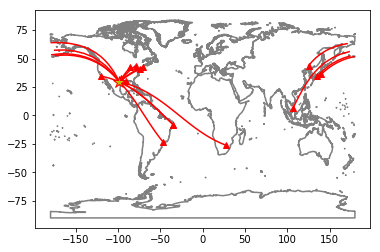

In [33]:
import pandas as pd
participants2018 = pd.read_csv('data/participants2018.csv',encoding='latin-1')
from shapely.geometry import shape
for feature in g['features']:
    sf = shape(feature['geometry'])
    if feature['geometry']['type'] == 'MultiPolygon':
        for geom in sf.geoms:
            plt.plot(*geom.exterior.xy, color='grey')
    else:
        plot(*sf.exterior.xy, color='grey')
    
for idx, p in participants2018.iterrows():
    plt.plot(p['lon'], p['lat'], '^', markerfacecolor='r', markeredgecolor='r')     

for idx, p in participants2018.iterrows():
    waypoints = geod.npts(sanantonio[0], sanantonio[1], p['lon'], p['lat'], 20)
    route = [sanantonio]
    route.extend(waypoints)
    route.append((p['lon'], p['lat']))
    route = np.array(route)
    if (route[:,0].max()-route[:,0].min())>180:
        min_index = route[:,0].argmin()+1
        plt.plot(route[:min_index,0], route[:min_index,1], color='r')
        plt.plot(route[min_index:,0], route[min_index:,1], color='r')
        continue
    plt.plot(route[:,0], route[:,1], color='r')
plt.plot(sanantonio[0],sanantonio[1],  '*', markerfacecolor='y', markeredgecolor='r', markersize=12)

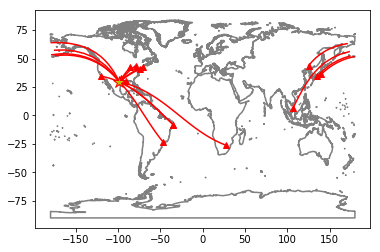

In [34]:
import pandas as pd
participants2018 = pd.read_csv('data/participants2018.csv',encoding='latin-1')
from shapely.geometry import shape
for feature in g['features']:
    sf = shape(feature['geometry'])
    if feature['geometry']['type'] == 'MultiPolygon':
        for geom in sf.geoms:
            plt.plot(*geom.exterior.xy, color='grey')
    else:
        plt.plot(*sf.exterior.xy, color='grey')
    
for idx, p in participants2018.iterrows():
    plt.plot(p['lon'], p['lat'], '^', markerfacecolor='r', markeredgecolor='r')     

for idx, p in participants2018.iterrows():
    waypoints = geod.npts(sanantonio[0], sanantonio[1], p['lon'], p['lat'], 20)
    route = [sanantonio]
    route.extend(waypoints)
    route.append((p['lon'], p['lat']))
    route = np.array(route)
    if (route[:,0].max()-route[:,0].min())>180:
        min_index = route[:,0].argmin()+1
        plt.plot(route[:min_index,0], route[:min_index,1], color='r')
        plt.plot(route[min_index:,0], route[min_index:,1], color='r')
        continue
    plt.plot(route[:,0], route[:,1], color='r')
plt.plot(sanantonio[0],sanantonio[1],  '*', markerfacecolor='y', markeredgecolor='r', markersize=12)
plt.savefig(fname='../figs/readmefigs/routes18.png')

### Plot the great circle routes bringing our participants to the workshop in 2016

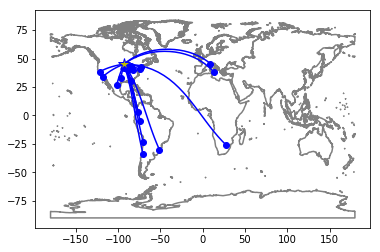

In [35]:
import pandas as pd
participants2016 = pd.read_csv('data/participants2016.csv',encoding='latin-1')
minn = (-93.2550, 44.9778)
from shapely.geometry import shape
for feature in g['features']:
    sf = shape(feature['geometry'])
    if feature['geometry']['type'] == 'MultiPolygon':
        for geom in sf.geoms:
            plt.plot(*geom.exterior.xy, color='grey')
    else:
        plt.plot(*sf.exterior.xy, color='grey')
    
for idx, p in participants2016.iterrows():
    plt.plot(p['lon'], p['lat'], 'o', markerfacecolor='b', markeredgecolor='b')     


for idx, p in participants2016.iterrows():
    waypoints = geod.npts(minn[0], minn[1], p['lon'], p['lat'], 20)
    route = [minn]
    route.extend(waypoints)
    route.append((p['lon'], p['lat']))
    route = np.array(route)
    plt.plot(route[:,0], route[:,1], color='b')
plt.plot(minn[0],minn[1],  '*', markerfacecolor='y', markeredgecolor='b', markersize=12)

## Plot 2017 Participant Travel

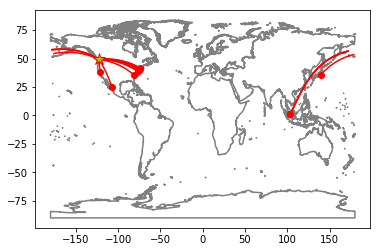

In [36]:
import pandas as pd
participants2017 = pd.read_csv('data/participants2017.csv',encoding='latin-1')
vancouver = (-123.1207, 49.2827)


from shapely.geometry import shape
for feature in g['features']:
    sf = shape(feature['geometry'])
    if feature['geometry']['type'] == 'MultiPolygon':
        for geom in sf.geoms:
            plt.plot(*geom.exterior.xy, color='grey')
    else:
        plt.plot(*sf.exterior.xy, color='grey')
    
for idx, p in participants2017.iterrows():
    plt.plot(p['lon'], p['lat'], 'o', markerfacecolor='r', markeredgecolor='r')     


for idx, p in participants2017.iterrows():
    waypoints = geod.npts(vancouver[0], vancouver[1], p['lon'], p['lat'], 20)
    route = [vancouver]
    route.extend(waypoints)
    route.append((p['lon'], p['lat']))
    route = np.array(route)
    if (route[:,0].max()-route[:,0].min())>180:
        min_index = route[:,0].argmin()+1
        plt.plot(route[:min_index,0], route[:min_index,1], color='r')
        plt.plot(route[min_index:,0], route[min_index:,1], color='r')
        continue
    plt.plot(route[:,0], route[:,1], color='r')
plt.plot(vancouver[0],vancouver[1],  '*', markerfacecolor='y', markeredgecolor='r', markersize=12)

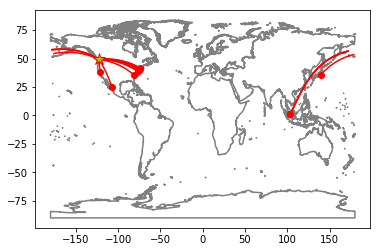

In [37]:
import pandas as pd
participants2017 = pd.read_csv('data/participants2017.csv',encoding='latin-1')
vancouver = (-123.1207, 49.2827)


from shapely.geometry import shape
for feature in g['features']:
    sf = shape(feature['geometry'])
    if feature['geometry']['type'] == 'MultiPolygon':
        for geom in sf.geoms:
           plt.plot(*geom.exterior.xy, color='grey')
    else:
        plt.plot(*sf.exterior.xy, color='grey')
    
for idx, p in participants2017.iterrows():
    plt.plot(p['lon'], p['lat'], 'o', markerfacecolor='r', markeredgecolor='r')     


for idx, p in participants2017.iterrows():
    waypoints = geod.npts(vancouver[0], vancouver[1], p['lon'], p['lat'], 20)
    route = [vancouver]
    route.extend(waypoints)
    route.append((p['lon'], p['lat']))
    route = np.array(route)
    if (route[:,0].max()-route[:,0].min())>180:
        min_index = route[:,0].argmin()+1
        plt.plot(route[:min_index,0], route[:min_index,1], color='r')
        plt.plot(route[min_index:,0], route[min_index:,1], color='r')
        continue
    plt.plot(route[:,0], route[:,1], color='r')
plt.plot(vancouver[0],vancouver[1],  '*', markerfacecolor='y', markeredgecolor='r', markersize=12)

## Subplots

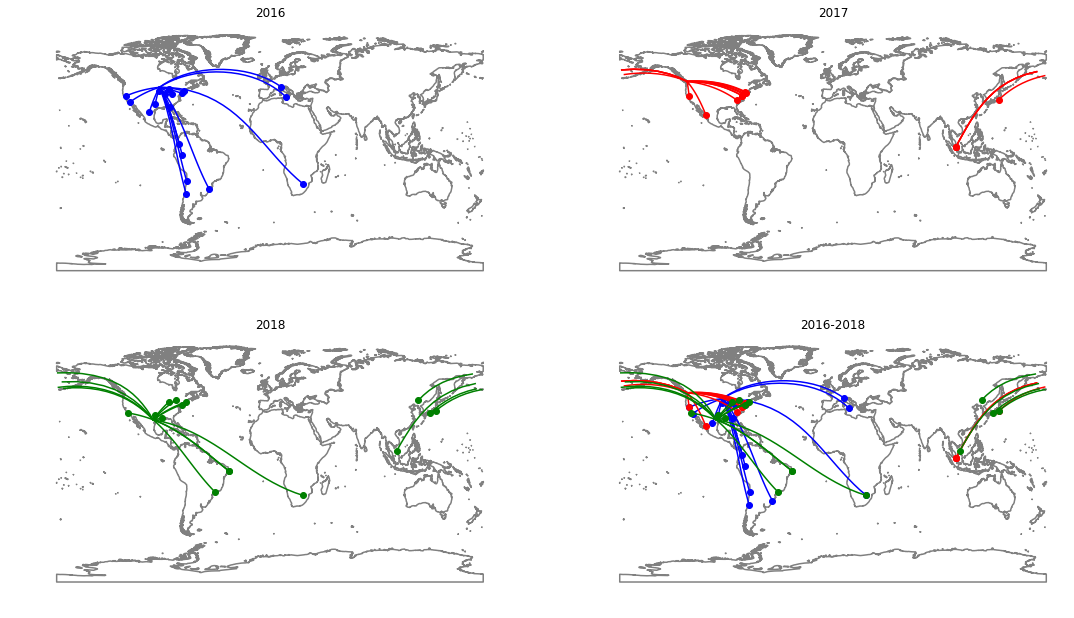

In [39]:
fig, axes = plt.subplots(2, 2)
#axes[0, 0].plot(x, y)
#axes[1, 1].scatter(x, y)
for feature in g['features']:
    sf = shape(feature['geometry'])
    if feature['geometry']['type'] == 'MultiPolygon':
        for geom in sf.geoms:
            axes[0,0].plot(*geom.exterior.xy, color='grey')
    else:
        axes[0,0].plot(*sf.exterior.xy, color='grey')
participants2016 = pd.read_csv('data/participants2016.csv',encoding='latin-1')
    
for idx, p in participants2016.iterrows():
    axes[0,0].plot(p['lon'], p['lat'], 'o', markerfacecolor='b', markeredgecolor='b')     
    
for idx, p in participants2016.iterrows():
    waypoints = geod.npts(minn[0], minn[1], p['lon'], p['lat'], 20)
    route = [minn]
    route.extend(waypoints)
    route.append((p['lon'], p['lat']))
    route = np.array(route)
    axes[0,0].plot(route[:,0], route[:,1], color='b')
    axes[0,0].title.set_text('2016')


axes[0,0].axis('off')

# 2017

participants2017 = pd.read_csv('data/participants2017.csv', encoding='latin-1')

vancouver = (-123.1207, 49.2827)


from shapely.geometry import shape
for feature in g['features']:
    sf = shape(feature['geometry'])
    if feature['geometry']['type'] == 'MultiPolygon':
        for geom in sf.geoms:
            axes[0,1].plot(*geom.exterior.xy, color='grey')
    else:
        axes[0,1].plot(*sf.exterior.xy, color='grey')
    
for idx, p in participants2017.iterrows():
    axes[0,1].plot(p['lon'], p['lat'], 'o', markerfacecolor='r', markeredgecolor='r')     


for idx, p in participants2017.iterrows():
    waypoints = geod.npts(vancouver[0], vancouver[1], p['lon'], p['lat'], 20)
    route = [vancouver]
    route.extend(waypoints)
    route.append((p['lon'], p['lat']))
    route = np.array(route)
    if (route[:,0].max()-route[:,0].min())>180:
        min_index = route[:,0].argmin()+1
        axes[0,1].plot(route[:min_index,0], route[:min_index,1], color='r')
        axes[0,1].plot(route[min_index:,0], route[min_index:,1], color='r')
        continue
    axes[0,1].plot(route[:,0], route[:,1], color='r')
    axes[0,1].title.set_text('2017')
    axes[0,1].axis('off')


# 2018

for feature in g['features']:
    sf = shape(feature['geometry'])
    if feature['geometry']['type'] == 'MultiPolygon':
        for geom in sf.geoms:
            axes[1,0].plot(*geom.exterior.xy, color='grey')
    else:
        axes[1,0].plot(*sf.exterior.xy, color='grey')

for idx, p in participants2018.iterrows():
    waypoints = geod.npts(sanantonio[0], sanantonio[1], p['lon'], p['lat'], 20)
    route = [sanantonio]
    route.extend(waypoints)
    route.append((p['lon'], p['lat']))
    route = np.array(route)
    if (route[:,0].max()-route[:,0].min())>180:
        min_index = route[:,0].argmin()+1
        axes[1,0].plot(route[:min_index,0], route[:min_index,1], color='g')
        axes[1,0].plot(route[min_index:,0], route[min_index:,1], color='g')
        continue
    axes[1,0].plot(route[:,0], route[:,1], color='g')   
    axes[1,0].title.set_text('2018')

for idx, p in participants2018.iterrows():
    axes[1,0].plot(p['lon'], p['lat'], 'o', markerfacecolor='g', markeredgecolor='g')     
axes[1,0].axis('off')


# all three years
for feature in g['features']:
    sf = shape(feature['geometry'])
    if feature['geometry']['type'] == 'MultiPolygon':
        for geom in sf.geoms:
            axes[1,1].plot(*geom.exterior.xy, color='grey')
    else:
        axes[1,1].plot(*sf.exterior.xy, color='grey')
    
for idx, p in participants2016.iterrows():
    axes[1,1].plot(p['lon'], p['lat'], 'o', markerfacecolor='b', markeredgecolor='b')     
    
for idx, p in participants2016.iterrows():
    waypoints = geod.npts(minn[0], minn[1], p['lon'], p['lat'], 20)
    route = [minn]
    route.extend(waypoints)
    route.append((p['lon'], p['lat']))
    route = np.array(route)
    axes[1,1].plot(route[:,0], route[:,1], color='b')

    

for idx, p in participants2017.iterrows():
    axes[1,1].plot(p['lon'], p['lat'], 'o', markerfacecolor='r', markeredgecolor='r')     


for idx, p in participants2017.iterrows():
    waypoints = geod.npts(vancouver[0], vancouver[1], p['lon'], p['lat'], 20)
    route = [vancouver]
    route.extend(waypoints)
    route.append((p['lon'], p['lat']))
    route = np.array(route)
    if (route[:,0].max()-route[:,0].min())>180:
        min_index = route[:,0].argmin()+1
        axes[1,1].plot(route[:min_index,0], route[:min_index,1], color='r')
        axes[1,1].plot(route[min_index:,0], route[min_index:,1], color='r')
        continue
    axes[1,1].plot(route[:,0], route[:,1], color='r')   
    

    
 
for idx, p in participants2018.iterrows():
    waypoints = geod.npts(sanantonio[0], sanantonio[1], p['lon'], p['lat'], 20)
    route = [sanantonio]
    route.extend(waypoints)
    route.append((p['lon'], p['lat']))
    route = np.array(route)
    if (route[:,0].max()-route[:,0].min())>180:
        min_index = route[:,0].argmin()+1
        axes[1,1].plot(route[:min_index,0], route[:min_index,1], color='g')
        axes[1,1].plot(route[min_index:,0], route[min_index:,1], color='g')
        continue
    axes[1,1].plot(route[:,0], route[:,1], color='g')   
    
for idx, p in participants2018.iterrows():
    axes[1,1].plot(p['lon'], p['lat'], 'o', markerfacecolor='g', markeredgecolor='g')   
axes[1,1].title.set_text('2016-2018')

axes[1,1].axis('off')




fig.set_size_inches(18.5, 10.5, forward=True)
plt.savefig(fname='quad.png')